In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Create dataset to fit a line

In [2]:
# Define how many dataset points to create
x_range = 50

# Create linspaced x
x = [x for x in range(x_range)]

# Create dataset points
y_true = [2*x + (5*random.randint(0, 10)) for x in range(x_range)]

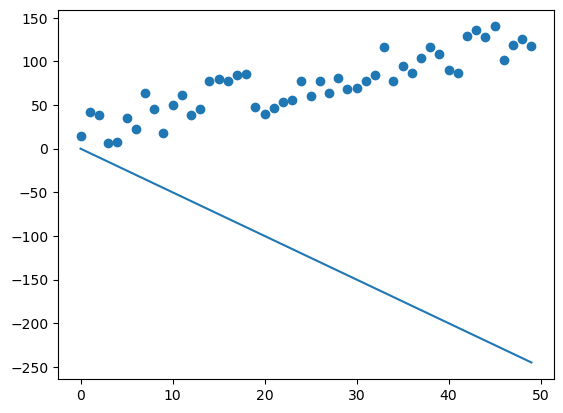

In [3]:
# Calculate predicted line
def prediction(w, b):
    y_predicted = [w*x+b for x in x]
    return y_predicted

# Calculate loss
def loss_fn(y_true, y_predicted):
    diff = [(y_predicted[idx] - y_true[idx])**2 for idx in range(x_range)]
    return sum(diff) / (2*x_range)

# Define (w,b) parameters
w, b = -5, 0

# Calculate predicted y values for initiated parameters (w, b)
y_init = prediction(w, b)
# Calculate loss value
loss = loss_fn(y_true, y_init)


# Plot dataset and initial line
plt.scatter(x, y_true)
plt.plot(x, y_init)
plt.show()

In [6]:
def loss_derivatives():
    d_w = sum([((w*x+b) - y_true[x]) * x for x in x])/len(x)
    d_b = sum([((w*x+b) - y_true[x]) for x in x])/len(x)
    return d_w, d_b

def update_parameters(w, b, d_w, d_b):
    w = w - d_w * lr
    b = b - d_b * lr
    return w, b

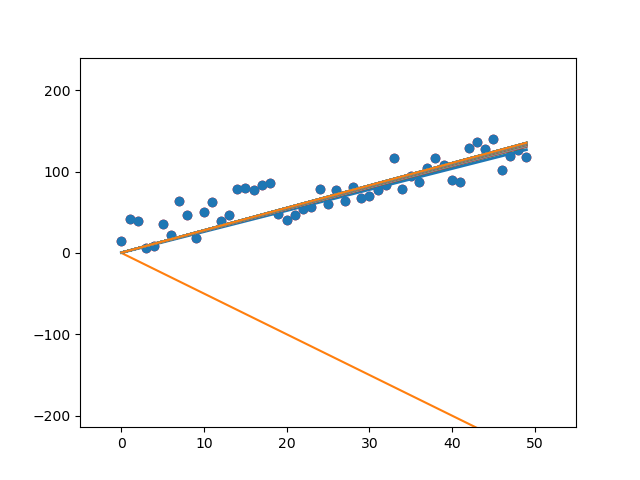

In [7]:
# Define hyperparameters
lr = 0.0001
epochs = 50

y_predicted = []
plt.plot(x, y_init)
for i in range(epochs):
    d_w, d_b = loss_derivatives()
    w, b = update_parameters(w, b, d_w, d_b)
    y_pred = prediction(w, b)
    loss = loss_fn(y_true, y_pred)

    if i%1 == 0:
        y_predicted.append(y_pred)
        plt.plot(x, y_pred)

plt.scatter(x, y_true)
plt.show()

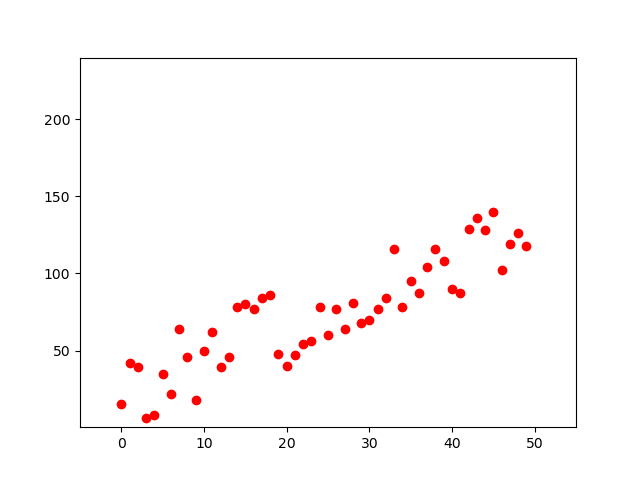

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
import random

%matplotlib ipympl


fig = plt.figure()
ax = plt.axes(xlim=(-5, x_range+5), ylim=(min(y_predicted[0]), max(y_true)+100))
line, = ax.plot([], [], lw=2)
ax.scatter(x, y_true, color='r')


def init():
    line.set_data([], [])
    return line

def animate(i): 
    line.set_data(x, y_predicted[i])
    return line,



anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(y_predicted), interval=100, blit=True)